### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [3]:
### Data Collection
import pandas_datareader as pdr # used to access public financial data from the internet and import it into python as DataFrame
key=""

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

ValueError: The tiingo API key must be provided either through the api_key variable or through the environmental variable TIINGO_API_KEY.

### Steps:
### I) Collect Stock data
### II) Preprocess the data - Train and Test
### III) Create a stacked LSTM model
### IV) Predict the test data and plot the output
### V) Predict the future 30 days and plot the output

In [5]:
df.to_csv('AAPL.csv')

NameError: name 'df' is not defined

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head() # First 5 rows

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail() # Last five rows 

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1=df.reset_index()['close'] #Getting all the close values in df1 because that's what we need to predict

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

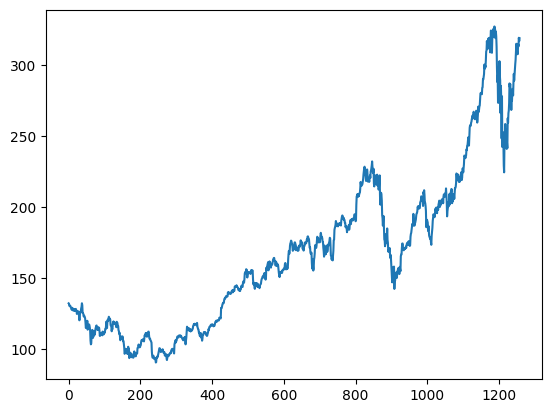

In [7]:
import matplotlib.pyplot as plt #Plotting the close column
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler to transform values between 0 - 1

In [9]:
import numpy as np

In [10]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # Scale down between 0 to 1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # Reshaped to an array
# Here, np.array(df1) is used to convert the data frame into a numpy array
#reshape(-1, 1): The reshape() method is called on the NumPy array. By passing (-1, 1) as the argument, 
# we are instructing NumPy to reshape the array into a single column format, where the number of rows is 
# determined automatically based on the original data. This is commonly done to convert a 1-dimensional array 
# into a 2-dimensional array with a single column.

In [12]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [13]:
##splitting dataset into train and test split
# In time series data like stock forecast, the next data is always related to the previous data, so we will split the data 
# arranged in a date wise manner and not randomly.
training_size=int(len(df1)*0.65) # 65% of the data, i.e first 65% of the rows of the dataset will be used to train the model 
test_size=len(df1)-training_size # 35% of the data will be used for testing 
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

# df1[0:training_size, :]: This part selects a subset of rows from the DataFrame df1 for the training data. 
# The notation 0:training_size specifies the range of rows to be included, starting from the 0th row and ending at the 
# training_size - 1th row. The : after the comma indicates that all columns should be included.

# df1[training_size:len(df1), :1]: This part selects a subset of rows from the DataFrame df1 for the testing data. 
# The notation training_size:len(df1) specifies the range of rows to be included, starting from the training_sizeth row 
# and ending at the last row (len(df1) - 1). The :1 indicates that only the first column should be included.



In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [16]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 ; 1,2,3----100  101; 2,3,4------101   102; and so on
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 # Previous 100 data to predict the next data
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential #Sequential is a class that allows us to build models in a sequential manner, 
                                                #where each layer is added on top of the previous one
from tensorflow.keras.layers import Dense  #Dense is a class that represents a fully connected layer in a neural network. 
                                            #It is one of the most commonly used layers and is often used for the output layer or intermediate layers in a model.
from tensorflow.keras.layers import LSTM  #LSTM stands for Long Short-Term Memory, 
#which is a type of recurrent neural network (RNN) layer. LSTM layers are used for modeling sequential data or time series data, 
# as they can effectively capture long-term dependencies and handle the vanishing gradient problem.

2023-10-01 23:32:21.474774: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# Stacked LSTM means one LSTM after another
model=Sequential() 

model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # 50: hidden layers, 
#The return_sequences=True parameter indicates that the LSTM layer should return the output sequences rather than 
# just the final output. 
# The input_shape=(100, 1) specifies the shape of the input data expected by the LSTM layer. It means that the input 
# data should have 100 time steps and 1 feature.

model.add(LSTM(50,return_sequences=True)) # This line adds another LSTM layer to the model. It has 50 hidden units and 
#also returns sequences.

model.add(LSTM(50)) #This line adds a third LSTM layer to the model. It has 50 hidden units, but this time, 
#the return_sequences parameter is not set to True. This means that this LSTM layer only returns the final output 
# sequence rather than the entire sequence.

model.add(Dense(1)) #This line adds a fully connected dense layer (also known as the output layer) to the model. 
#It has 1 unit, which represents the output dimension of the model.

model.compile(loss='mean_squared_error',optimizer='adam') 
# This line compiles the model by specifying the loss function and the optimizer. 
#The loss='mean_squared_error' sets the mean squared error as the loss function, which is commonly used for regression problems. 
# The optimizer='adam' sets the Adam optimizer, which is an efficient and widely used optimization algorithm, to update 
# the model's weights during training.


2023-10-01 23:32:24.564272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 23:32:24.567119: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
# epochs=100: This parameter defines the number of epochs, which represents the number of times the model will 
# iterate over the entire training dataset during the training process. In this case, the model will be 
# trained for 100 epochs.

# batch_size=64: This parameter determines the number of samples or instances in each batch of data used for each update 
# of the model's weights. The training data will be divided into batches, and the model's weights will be updated after 
# processing each batch. Here, each batch will contain 64 samples.

# verbose=1: This parameter controls the verbosity mode during training. In this case, verbose=1 means that training 
# progress updates will be printed for each epoch. It will display information such as the epoch number, the training loss, 
# and the validation loss.

Epoch 1/100
12/12 [==============================] - 12s 708ms/step - loss: 0.0198 - val_loss: 0.0463
Epoch 2/100
12/12 [==============================] - 8s 679ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 7s 580ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 4/100
12/12 [==============================] - 11s 904ms/step - loss: 8.8739e-04 - val_loss: 0.0064
Epoch 5/100
12/12 [==============================] - 8s 632ms/step - loss: 6.7831e-04 - val_loss: 0.0054
Epoch 6/100
12/12 [==============================] - 8s 676ms/step - loss: 6.0158e-04 - val_loss: 0.0038
Epoch 7/100
12/12 [==============================] - 9s 768ms/step - loss: 6.3971e-04 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 8s 695ms/step - loss: 5.8935e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 7s 636ms/step - loss: 6.0198e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 9s 770ms/st

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.10.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 109ms/step


In [31]:
##Transformback to original form
# this is done so that we can calculate the root mean square error (RMSE)
train_predict=scaler.inverse_transform(train_predict) 
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.24402629359497

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

240.88787095398428

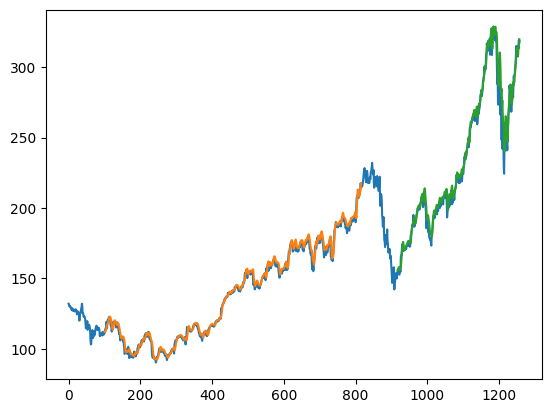

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100 #look_back = 100: This line assigns the value 100 to the variable look_back. 
#It is used as a parameter to determine the plot range.

trainPredictPlot = numpy.empty_like(df1) # This line creates a new NumPy array named trainPredictPlot with the same 
# shape as the DataFrame df1. The array is initially filled with uninitialized values.

trainPredictPlot[:, :] = np.nan # This line sets all values in the trainPredictPlot array to NaN (Not a Number). 
# NaN is used to indicate missing or undefined values in the array.

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict # This line assigns the train_predict values to a 
# subset of the trainPredictPlot array. It starts from the index look_back and goes up to 
# len(train_predict) + look_back, covering the corresponding rows. The train_predict values are assigned to this 
# range while leaving the rest as NaN.

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)

testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) 
#This line plots the original data (df1) after inverse transforming it using the scaler. 
# The scaler.inverse_transform() method is used to convert the scaled data back to its original scale.

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

441

# Predicting the data for the next 10 days

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

# reshape(1, -1): After extracting the data, the reshape method is called on the selected portion. 
#The reshape method is used to change the shape or dimensions of the array.

# The (1, -1) argument passed to reshape specifies the desired shape of the resulting array.
# The 1 in the first dimension indicates that you want the resulting array to have 1 row.
# The -1 in the second dimension is a placeholder that tells NumPy to automatically calculate 
#the size of that dimension based on the data and the size of the first dimension.


(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9705994]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

10 day output [[1.0231373]]
11 day input [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.9406400

20 day output [[1.069721]]
21 day input [0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.97059941 0.97416878 0.97912574 0.98475772 0.99066478
 0.99657279 1.00232005 1.0

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

1258

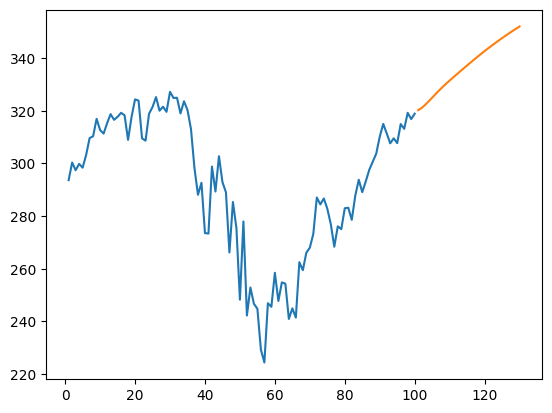

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

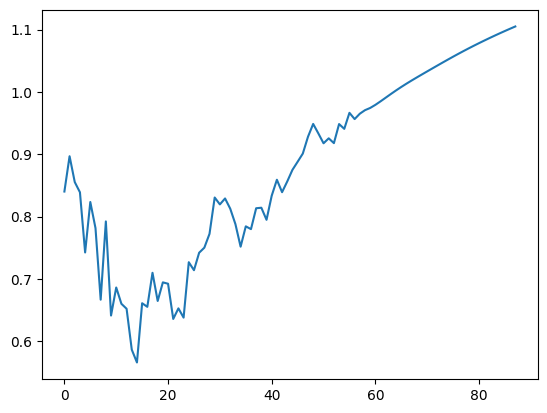

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

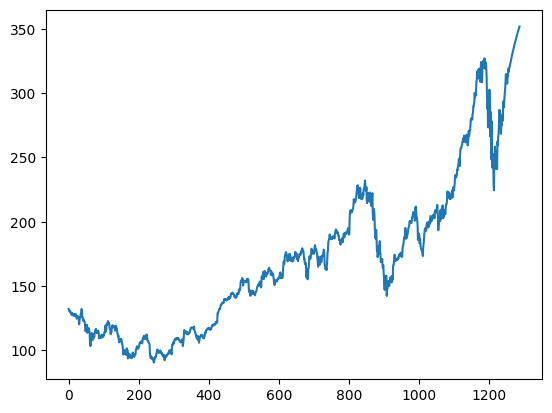

In [46]:
 plt.plot(df3)